In [19]:
import pandas as pd
financial = pd.read_csv('./financial.csv',encoding='ISO-8859-1',names=['sentiment','text'])
financial.dropna(inplace=True)
financial['sentiment'].replace({'neutral':0,'positive':1,'negative':-1},inplace=True)
# financial

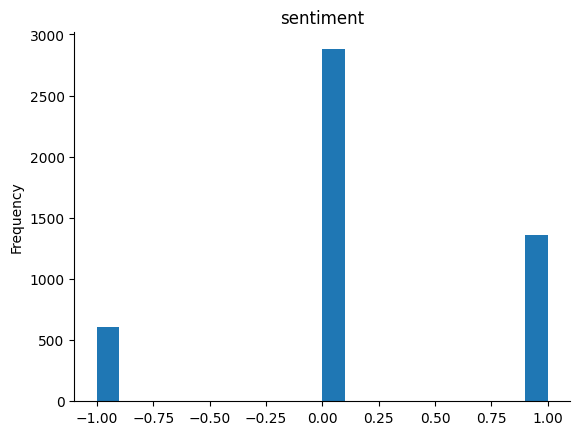

In [20]:
from matplotlib import pyplot as plt
financial['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Cleaning the data**

In [21]:
# Converting every sentence to lowercase
financial['text'] = financial['text'].apply(lambda x: x.lower())

# removing special charecters
import re

def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

financial['text'] = financial['text'].apply(lambda x: remove_special_characters(x))

# removing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

  # Loading stop words and removing negative stop words from the list
stop_words = stopwords.words('english')
words_to_keep = ['don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
my_stop_words = stop_words
for word in words_to_keep:
  my_stop_words.remove(word)

  # Removing stop words from the text
def remove_stop_words(text):
 tokens = word_tokenize(text)
 text_with_no_stop_words = [token for token in tokens if not token in my_stop_words]
 reformed_text =' '.join(text_with_no_stop_words)
 return reformed_text

financial['text'] = financial['text'].apply(lambda x: remove_stop_words(x))

# stemming
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

def lemmatise_sentence(text):
 token_words = word_tokenize(text)
 lemmatized_text = []
 for word in token_words:
  lemmatized_text.append(stemmer.stem(word))
  lemmatized_text.append(" ")
 return "".join(lemmatized_text)
financial['text'] = financial['text'].apply(lambda x: lemmatise_sentence(x))
# print(financial)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(financial['text'], financial['sentiment'], test_size=0.2, random_state=42)
# Vectorize text
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [23]:
# Logistic Regression Classifier
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
logistic_accuracy = lr.score(X_test, y_test)
print(logistic_accuracy)

0.7536082474226804


Accuracy: 0.754
Precision: [0.72619048 0.77004539 0.71555556]
Recall: [0.55454545 0.89141856 0.55709343]
F1 Score: [0.62886598 0.8262987  0.62645914]


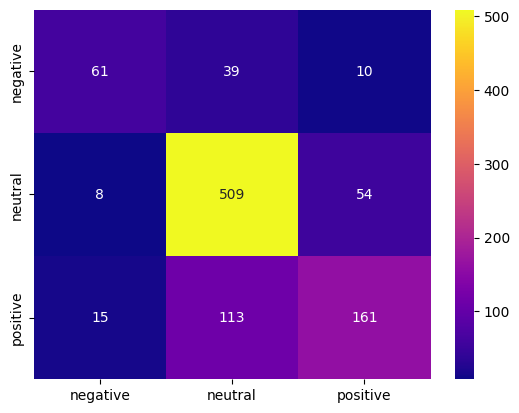

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test,y_pred)

accuracy = np.trace(cm) / np.sum(cm)
precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

sns.heatmap(cm, xticklabels=['negative','neutral','positive'], yticklabels=['negative','neutral','positive'], annot=True, fmt='d', annot_kws={'fontsize': 10}, cmap="plasma")

print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

In [25]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_accuracy = nb.score(X_test,y_test)
print(nb_accuracy)

0.7051546391752578


Accuracy: 0.705
Precision: [0.60674157 0.74107143 0.63157895]
Recall: [0.49090909 0.87215412 0.4567474 ]
F1 Score: [0.54271357 0.80128721 0.53012048]


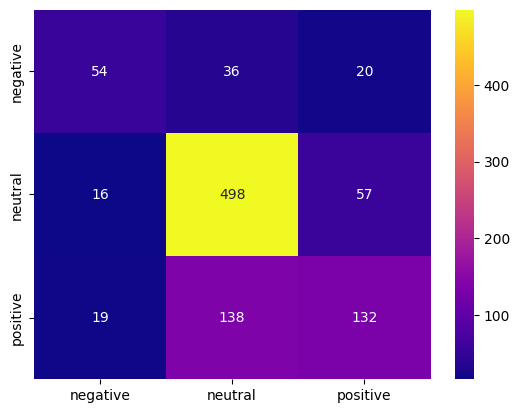

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test,y_pred)

accuracy = np.trace(cm) / np.sum(cm)
precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

sns.heatmap(cm, xticklabels=['negative','neutral','positive'], yticklabels=['negative','neutral','positive'], annot=True, fmt='d', annot_kws={'fontsize': 10}, cmap="plasma")

print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))